In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from cassava.utils import plot_image

In [3]:
%matplotlib inline

In [4]:
train_images_torch_2020 = context.catalog.load('train_images_torch_2020')
test_images_torch_2020 = context.catalog.load('test_images_torch_2020')
train_images_torch_2019 = context.catalog.load('train_images_torch_2019')
test_images_torch_2019 = context.catalog.load('test_images_torch_2019')
extra_images_torch_2019 = context.catalog.load('extra_images_torch_2019')

2020-12-23 13:43:10,520 - kedro.io.data_catalog - INFO - Loading data from `train_images_torch_2020` (ImageOneFolderDataSet)...
2020-12-23 13:43:10,584 - kedro.io.data_catalog - INFO - Loading data from `test_images_torch_2020` (ImageOneFolderDataSet)...
2020-12-23 13:43:10,636 - kedro.io.data_catalog - INFO - Loading data from `train_images_torch_2019` (ImageFolderDataSet)...
2020-12-23 13:43:10,695 - kedro.io.data_catalog - INFO - Loading data from `test_images_torch_2019` (ImageFolderDataSet)...
2020-12-23 13:43:10,744 - kedro.io.data_catalog - INFO - Loading data from `extra_images_torch_2019` (ImageFolderDataSet)...


In [5]:
datasets = {
        'train_2020': train_images_torch_2020,
        'train_2019': train_images_torch_2019,
        'test_2019': test_images_torch_2019,
        'extra_2019': extra_images_torch_2019,
    }

In [6]:
duplicates = context.catalog.load('duplicates')

2020-12-23 13:43:10,846 - kedro.io.data_catalog - INFO - Loading data from `duplicates` (CSVDataSet)...


In [7]:
def fetch_img(ds, idx):
    img, label = datasets[ds][idx]
    return img, label

In [8]:
duplicates.head()

,ds1,id1,label1,ds2,id2,label2
0,train_2020,53,3.0,extra_2019,8323,NaN
1,train_2020,17963,3.0,extra_2019,3493,NaN
2,train_2020,16189,3.0,extra_2019,7429,NaN
3,train_2020,20755,4.0,train_2019,327,0.0
4,train_2020,20413,0.0,extra_2019,3866,NaN


# Investigate random duplicate pair

In [9]:
def plot_pair(ds1, id1, label1, ds2, id2, label2):
    img1, _ = fetch_img(ds1, id1)
    img2, _ = fetch_img(ds2, id2)


    plt.figure(figsize=(10, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.title(f'{ds1}, label {label1}')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.axis('off')
    plt.title(f'{ds2}, label {label2}')
    plt.show()

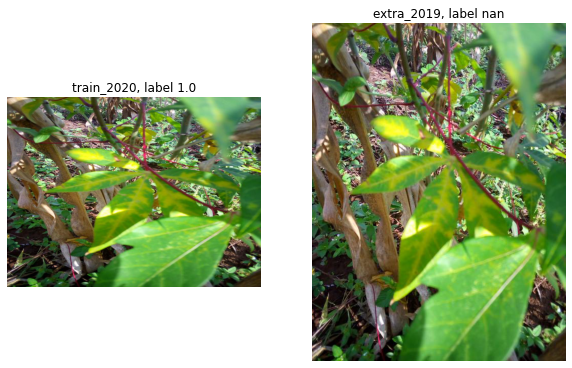

In [10]:
idx = np.random.choice(range(len(duplicates)))
row = duplicates.iloc[idx]

plot_pair(row.ds1, row.id1, row.label1, row.ds2, row.id2, row.label2)

# Duplicate distribution in datasets

In [11]:
duplicates.shape

(5570, 6)

In [12]:
print('Duplicates in train 2020')
duplicates[duplicates.ds1 == 'train_2020'].shape

Duplicates in train 2020


(5366, 6)

In [13]:
duplicates[['ds1', 'ds2']].value_counts()

ds1         ds2       
train_2020  extra_2019    4258
            train_2019     662
            test_2019      444
train_2019  test_2019       98
            train_2019      61
extra_2019  extra_2019      20
test_2019   test_2019       18
train_2019  extra_2019       4
test_2019   extra_2019       3
train_2020  train_2020       2
dtype: int64

In [14]:
print('Almost half of the 2019 extra images are now in train 2020 dataset')

Almost half of the 2019 extra images are now in train 2020 dataset


In [15]:
print('Sometimes labels do not agree')
duplicates[duplicates.label1 != duplicates.label2].dropna()

Sometimes labels do not agree


,ds1,id1,label1,ds2,id2,label2
3,train_2020,20755,4.0,train_2019,327,0.0
14,train_2019,1533,1.0,train_2019,5602,4.0
62,train_2020,5315,1.0,train_2019,4886,3.0
84,train_2020,2058,2.0,train_2019,388,0.0
181,train_2020,16242,4.0,train_2019,830,1.0
...,...,...,...,...,...,...
5150,train_2020,13508,4.0,train_2019,2386,2.0
5158,train_2020,5076,0.0,train_2019,1321,1.0
5226,train_2019,128,0.0,train_2019,2157,2.0
5307,train_2019,341,0.0,train_2019,2073,2.0


In [136]:
print('Duplicates in test 2019')
duplicates[duplicates.ds1 == 'test_2019'][['ds1', 'ds2']].value_counts()

Duplicates in test 2019


ds1        ds2       
test_2019  test_2019     18
           extra_2019     3
dtype: int64

In [148]:
duplicates[(duplicates.ds1 == 'test_2019') & (duplicates.ds2 == 'test_2019')].head()

,ds1,id1,label1,ds2,id2,label2
150,test_2019,656,NaN,test_2019,1443,NaN
501,test_2019,625,NaN,test_2019,3586,NaN
1108,test_2019,363,NaN,test_2019,2439,NaN
1631,test_2019,2487,NaN,test_2019,2539,NaN
1946,test_2019,149,NaN,test_2019,1497,NaN


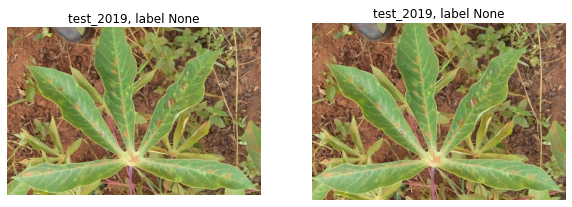

In [150]:
plot_pair('test_2019', 656, None, 'test_2019', 1443, None)

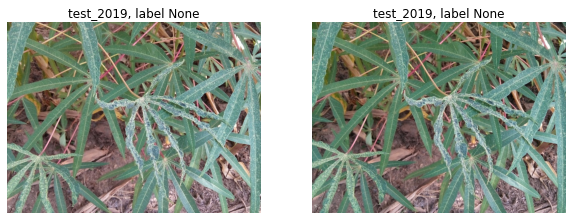

In [151]:
plot_pair('test_2019', 625, None, 'test_2019', 3586, None)

In [138]:
duplicates[(duplicates.ds1 == 'test_2019') & (duplicates.ds2 == 'extra_2019')]

,ds1,id1,label1,ds2,id2,label2
158,test_2019,2937,NaN,extra_2019,8731,NaN
1370,test_2019,2252,NaN,extra_2019,5026,NaN
5101,test_2019,72,NaN,extra_2019,8559,NaN


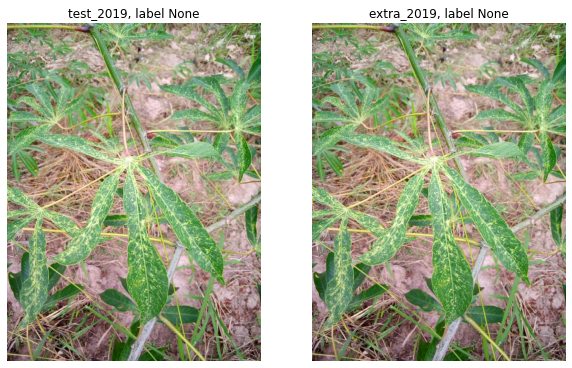

In [144]:
plot_pair('test_2019', 2937, None, 'extra_2019', 8731, None)

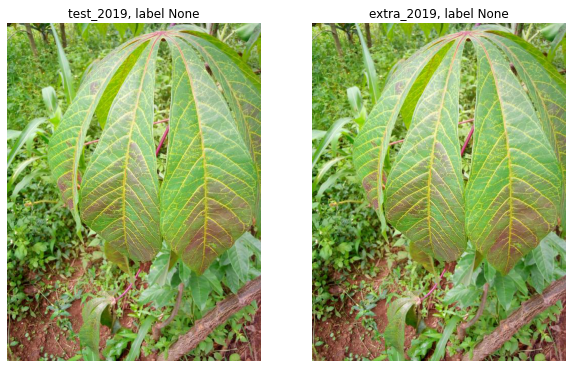

In [145]:
plot_pair('test_2019', 2252, None, 'extra_2019', 5026, None)

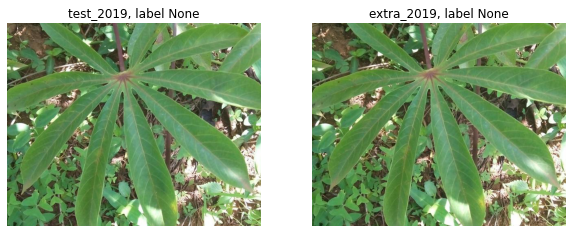

In [146]:
plot_pair('test_2019', 72, None, 'extra_2019', 8559, None)

In [14]:
duplicates[(duplicates.ds1 == 'train_2020') & (duplicates.ds2 == 'train_2019') & (duplicates.label1 != duplicates.label2)].head()

,ds1,id1,label1,ds2,id2,label2
3,train_2020,20755,4.0,train_2019,327,0.0
62,train_2020,5315,1.0,train_2019,4886,3.0
84,train_2020,2058,2.0,train_2019,388,0.0
181,train_2020,16242,4.0,train_2019,830,1.0
205,train_2020,10942,1.0,train_2019,3270,3.0


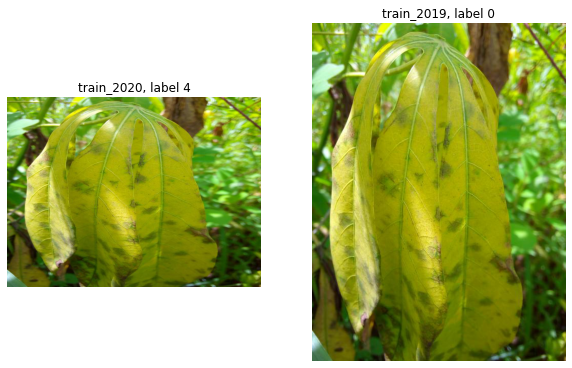

In [18]:
plot_pair('train_2020', 20755, 4, 'train_2019', 327, 0)

# Duplicate label distribution

In [104]:
duplicates.label1.value_counts(normalize=True)

3.0    0.631217
2.0    0.128052
1.0    0.122626
0.0    0.064207
4.0    0.053898
Name: label1, dtype: float64

In [105]:
duplicates.label2.value_counts(normalize=True)

3.0    0.492414
1.0    0.217931
2.0    0.197241
0.0    0.085517
4.0    0.006897
Name: label2, dtype: float64

In [24]:
duplicates[['label1', 'label2']].fillna('NA').value_counts()

label1  label2
3.0     NA        3134
2.0     NA         574
1.0     NA         523
3.0     3.0        341
0.0     NA         294
4.0     NA         279
1.0     1.0        129
2.0     2.0        121
0.0     0.0         44
NA      NA          41
0.0     1.0         12
1.0     2.0         10
3.0     1.0          8
1.0     0.0          8
        3.0          7
2.0     3.0          6
4.0     0.0          6
3.0     2.0          5
4.0     1.0          5
2.0     1.0          4
0.0     2.0          4
4.0     2.0          3
2.0     0.0          3
4.0     4.0          3
        3.0          2
3.0     4.0          1
0.0     3.0          1
3.0     0.0          1
1.0     4.0          1
dtype: int64